### Numpy Array to Image 

- Dataset: face_recog_10faces.csv
- Learning Date: 22-Oct-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

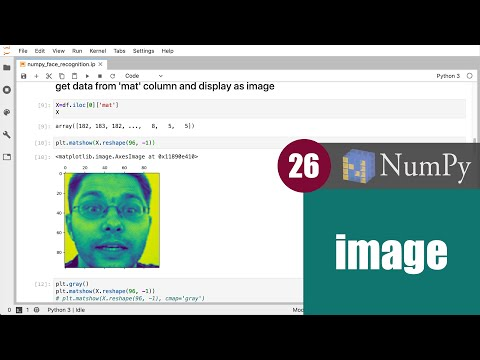

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('MROcF1GVG9o', width = 720, height = 405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# read facial data from csv file to a data frame

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/face_recog_10faces.csv'

df = pd.read_csv(url)
df

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...
7,8,156 160 162 166 150 114 97 105 125 127 119 121...
8,9,230 230 231 231 231 231 231 231 231 229 214 20...
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...


In [4]:
df.shape

(10, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  10 non-null     int64 
 1   Image    10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [6]:
np.fromstring('1 2 3 4', dtype = 'int', sep = ' ')

array([1, 2, 3, 4])

In [7]:
df.iloc[0]

ImageId                                                    1
Image      182 183 182 182 180 180 176 169 156 137 124 10...
Name: 0, dtype: object

In [8]:
df.iloc[9]

ImageId                                                   10
Image      132 129 126 128 146 163 170 169 143 101 71 55 ...
Name: 9, dtype: object

In [9]:
df.iloc[0][:50]

ImageId                                                    1
Image      182 183 182 182 180 180 176 169 156 137 124 10...
Name: 0, dtype: object

In [10]:
X = np.fromstring(df.iloc[0]['Image'], dtype = 'int', sep = ' ')
X

array([182, 183, 182, ...,   8,   5,   5])

In [11]:
X.shape

(9216,)

In [12]:
96*96

9216

### create numpy array from 'Image' column

In [13]:
df

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...
7,8,156 160 162 166 150 114 97 105 125 127 119 121...
8,9,230 230 231 231 231 231 231 231 231 229 214 20...
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...


In [15]:
# create a new column using numpy array

df['mat'] = df.apply(lambda r: np.fromstring(r['Image'], dtype = 'int', sep = ' '), axis = 1) # axis 1 is column wise
df

,ImageId,Image,mat
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,"[182, 183, 182, 182, 180, 180, 176, 169, 156, ..."
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,"[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3..."
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,"[177, 176, 174, 170, 169, 169, 168, 166, 166, ..."
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,"[176, 174, 174, 175, 174, 174, 176, 176, 175, ..."
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,"[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3..."
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,"[177, 177, 177, 171, 142, 115, 97, 84, 89, 90,..."
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,"[77, 55, 44, 56, 58, 61, 67, 66, 65, 65, 65, 7..."
7,8,156 160 162 166 150 114 97 105 125 127 119 121...,"[156, 160, 162, 166, 150, 114, 97, 105, 125, 1..."
8,9,230 230 231 231 231 231 231 231 231 229 214 20...,"[230, 230, 231, 231, 231, 231, 231, 231, 231, ..."
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...,"[132, 129, 126, 128, 146, 163, 170, 169, 143, ..."


### Get data from 'mat' column to display as image

In [16]:
X = df.iloc[0]['mat']
X

array([182, 183, 182, ...,   8,   5,   5])

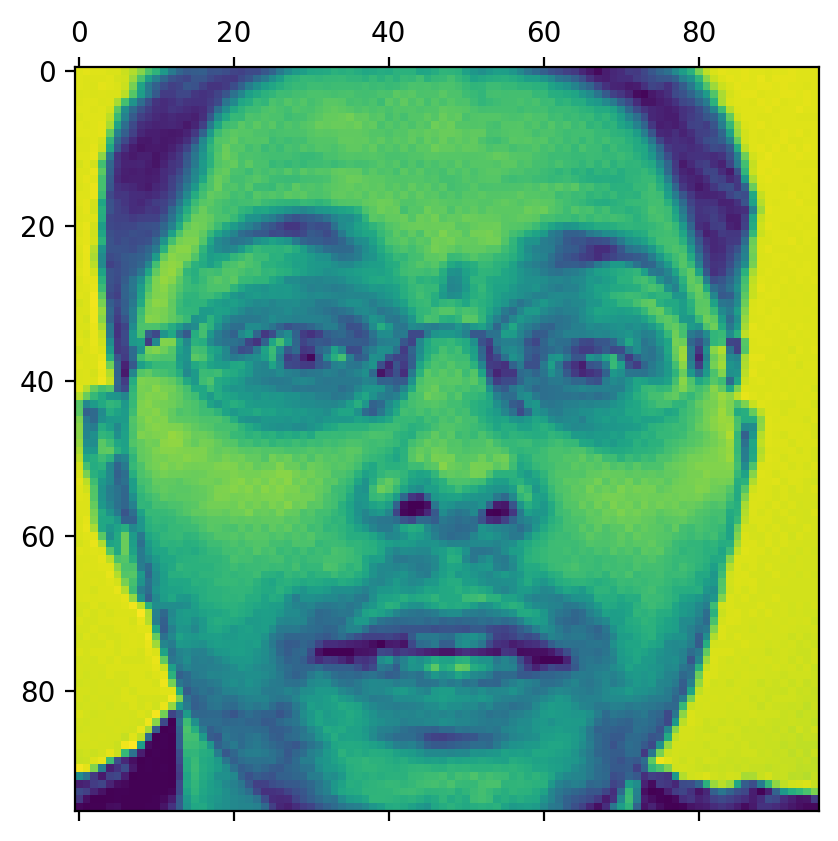

In [17]:
plt.matshow(X.reshape(96, -1))

<Figure size 640x480 with 0 Axes>

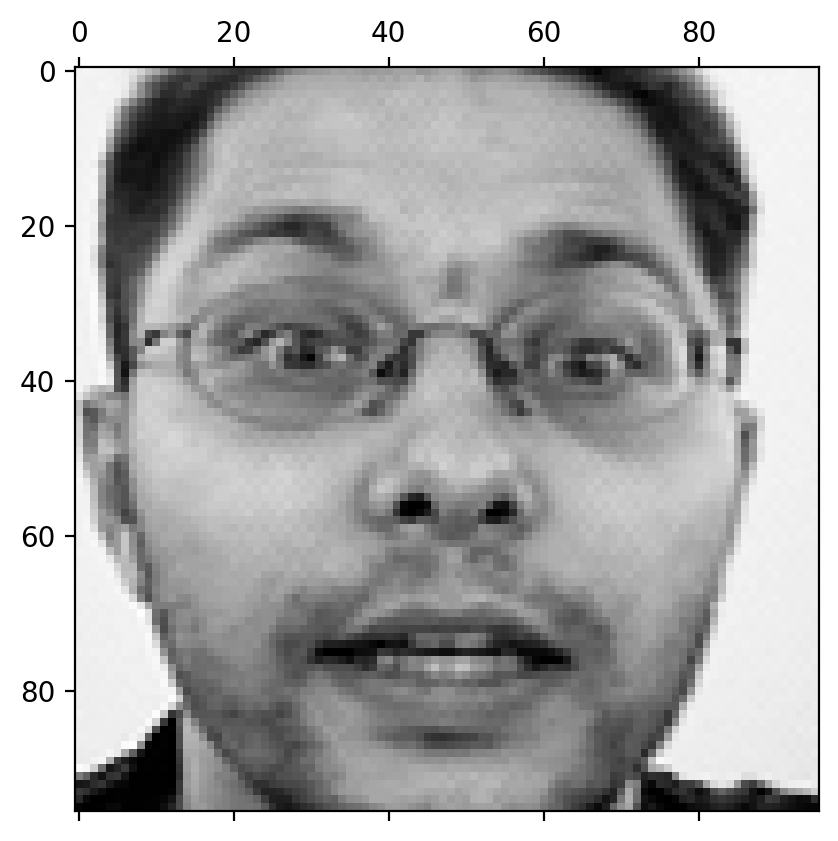

In [20]:
plt.gray()
plt.matshow(X.reshape(96, -1))

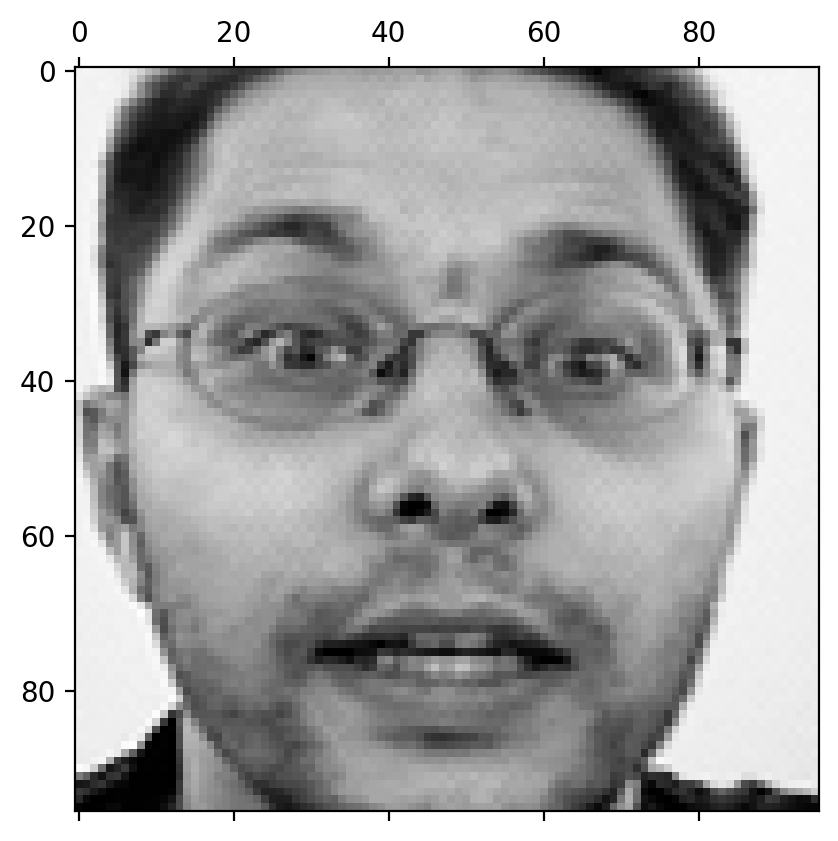

In [21]:
plt.matshow(X.reshape(96, -1), cmap='gray')

In [22]:
df

,ImageId,Image,mat
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,"[182, 183, 182, 182, 180, 180, 176, 169, 156, ..."
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,"[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3..."
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,"[177, 176, 174, 170, 169, 169, 168, 166, 166, ..."
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,"[176, 174, 174, 175, 174, 174, 176, 176, 175, ..."
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,"[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3..."
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,"[177, 177, 177, 171, 142, 115, 97, 84, 89, 90,..."
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,"[77, 55, 44, 56, 58, 61, 67, 66, 65, 65, 65, 7..."
7,8,156 160 162 166 150 114 97 105 125 127 119 121...,"[156, 160, 162, 166, 150, 114, 97, 105, 125, 1..."
8,9,230 230 231 231 231 231 231 231 231 229 214 20...,"[230, 230, 231, 231, 231, 231, 231, 231, 231, ..."
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...,"[132, 129, 126, 128, 146, 163, 170, 169, 143, ..."


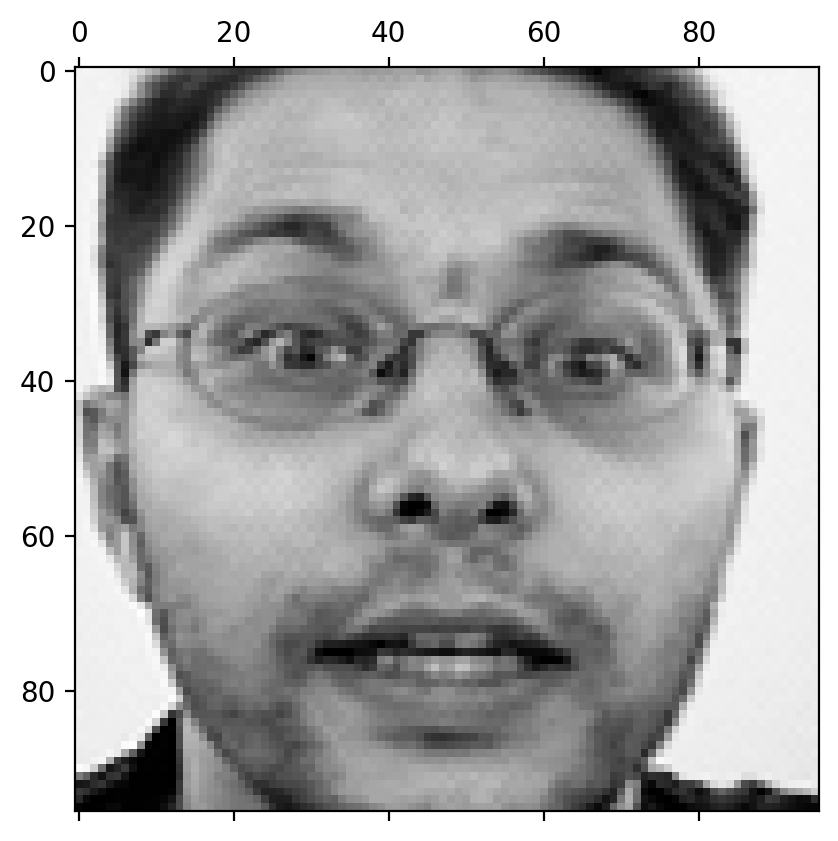

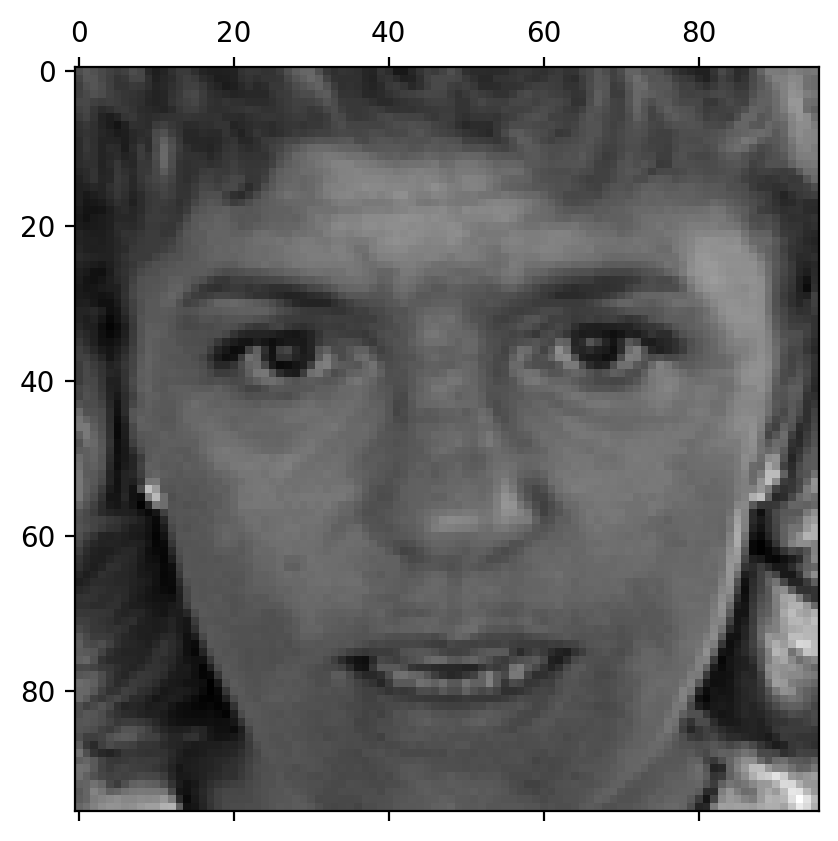

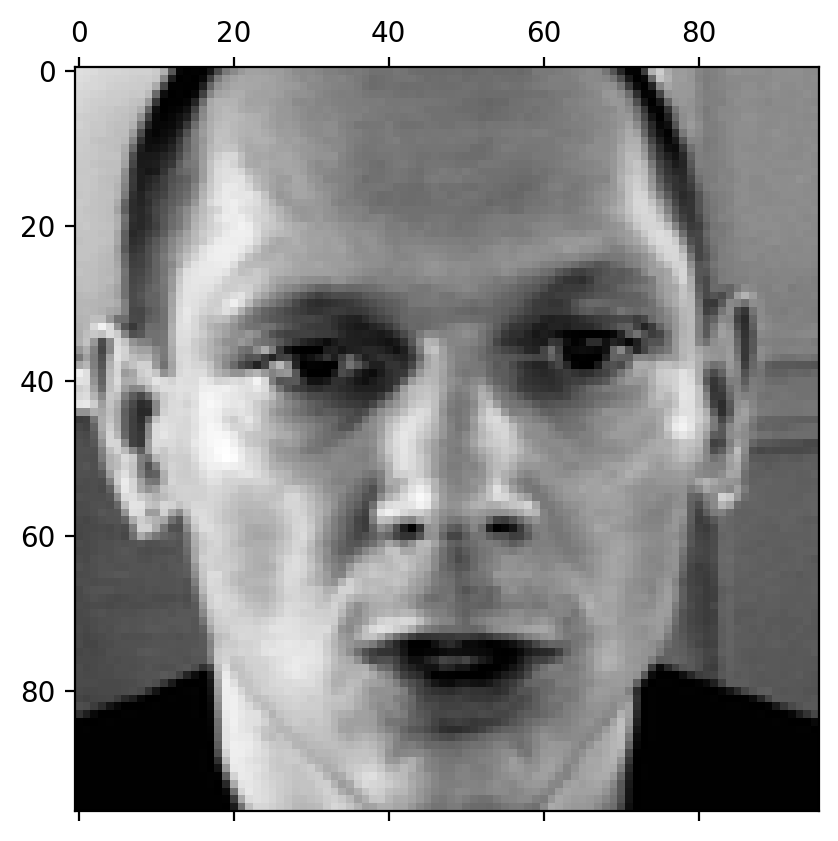

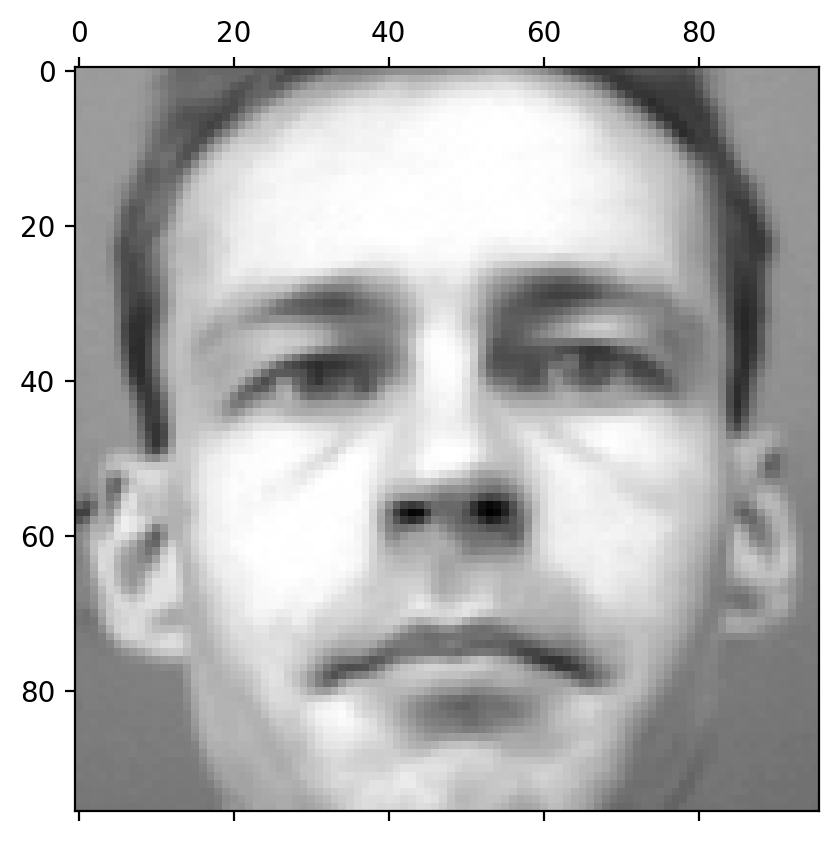

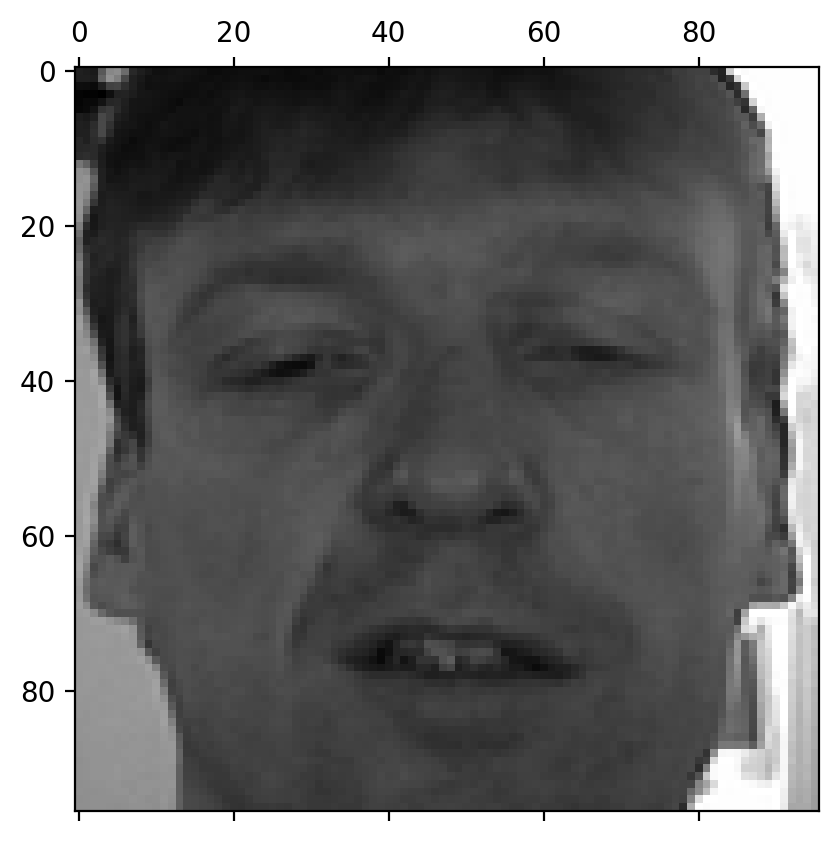

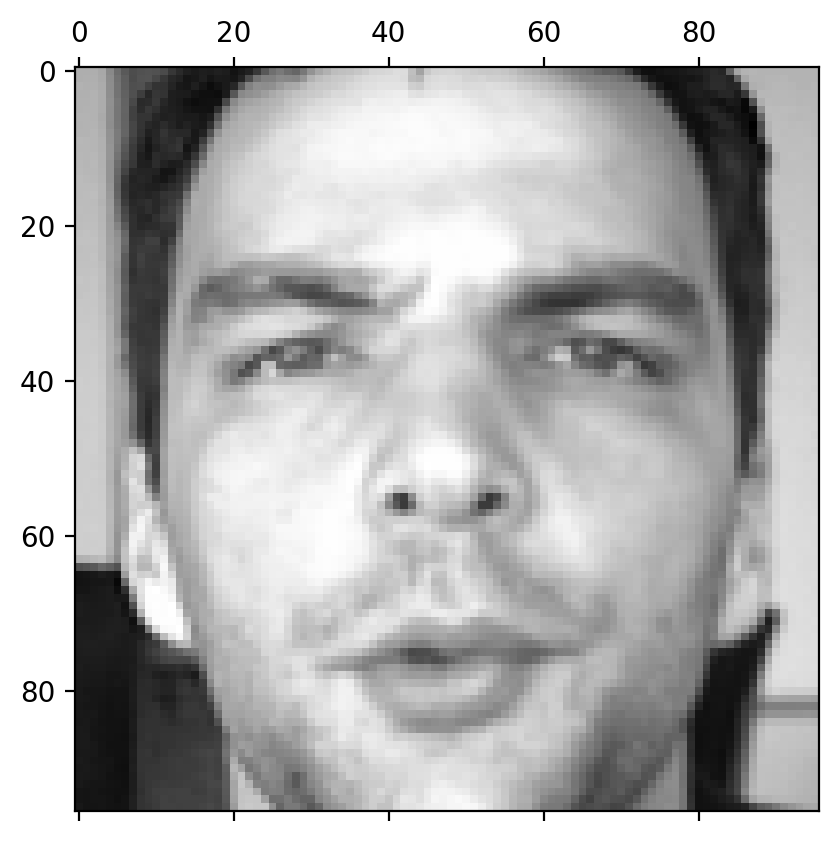

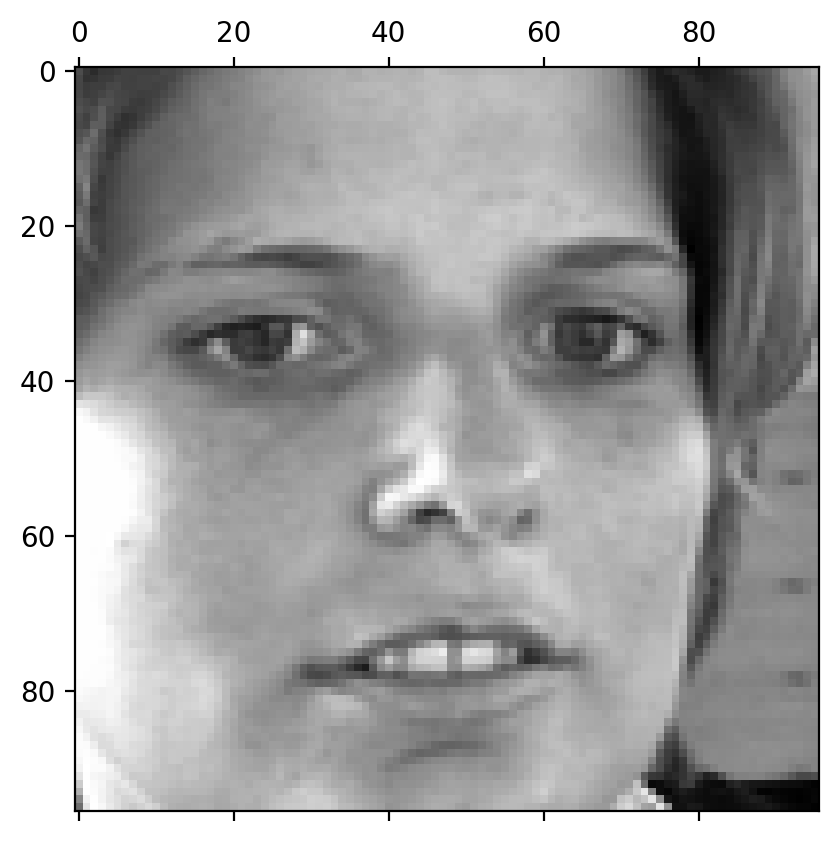

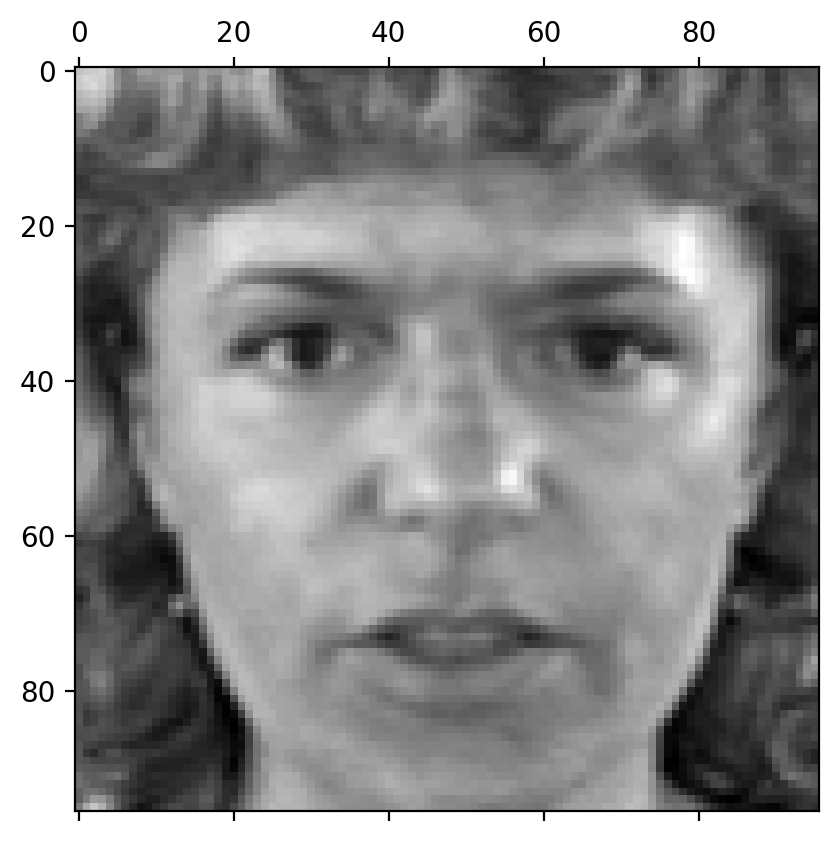

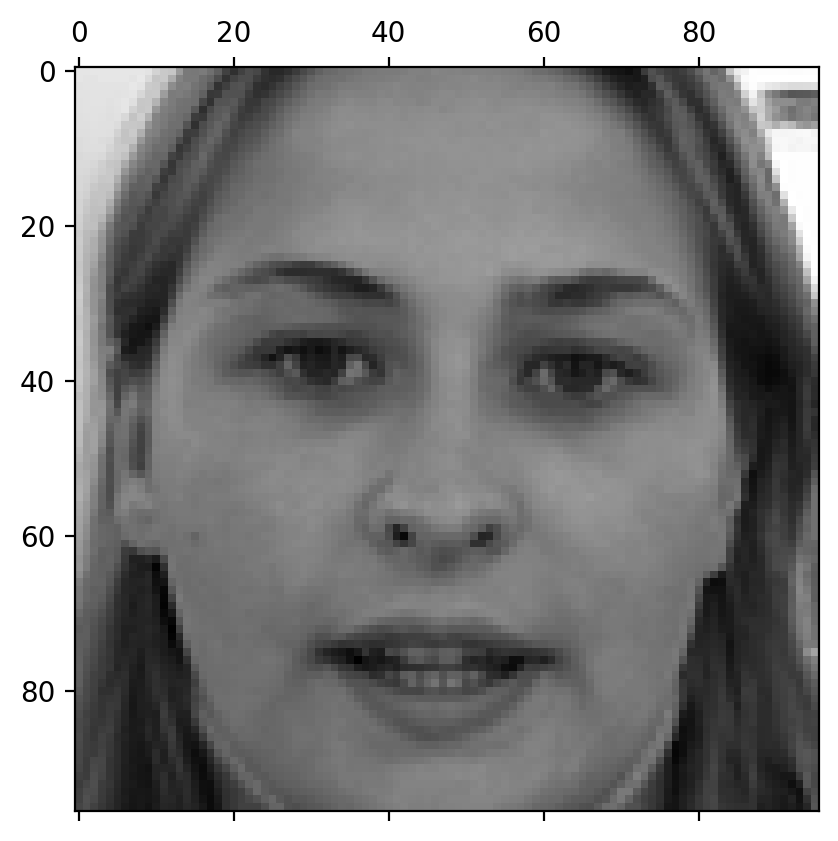

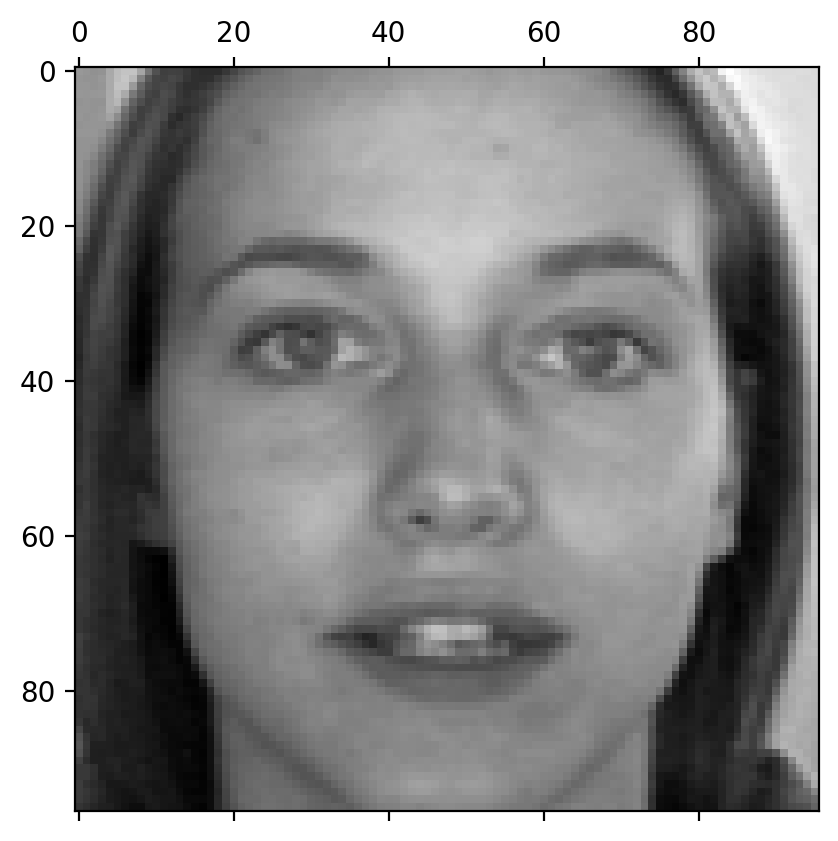

In [23]:
# show all images in gray

for i in range(10):

    X = df.iloc[i]['mat']
    plt.matshow(X.reshape(96, -1), cmap = 'gray')

### vstack df['mat'] to create a single 2D numpy array

In [24]:
df

,ImageId,Image,mat
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,"[182, 183, 182, 182, 180, 180, 176, 169, 156, ..."
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,"[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3..."
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,"[177, 176, 174, 170, 169, 169, 168, 166, 166, ..."
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,"[176, 174, 174, 175, 174, 174, 176, 176, 175, ..."
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,"[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3..."
5,6,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,"[177, 177, 177, 171, 142, 115, 97, 84, 89, 90,..."
6,7,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,"[77, 55, 44, 56, 58, 61, 67, 66, 65, 65, 65, 7..."
7,8,156 160 162 166 150 114 97 105 125 127 119 121...,"[156, 160, 162, 166, 150, 114, 97, 105, 125, 1..."
8,9,230 230 231 231 231 231 231 231 231 229 214 20...,"[230, 230, 231, 231, 231, 231, 231, 231, 231, ..."
9,10,132 129 126 128 146 163 170 169 143 101 71 55 ...,"[132, 129, 126, 128, 146, 163, 170, 169, 143, ..."


In [25]:
M = np.vstack(df['mat'])
M

array([[182, 183, 182, ...,   8,   5,   5],
       [ 76,  87,  81, ..., 228, 211, 168],
       [177, 176, 174, ...,   1,   1,   1],
       ...,
       [156, 160, 162, ...,  44,  48,  43],
       [230, 230, 231, ...,  35,  50,  95],
       [132, 129, 126, ...,  67,  71,  87]])

In [26]:
M.shape

(10, 9216)

In [27]:
M[1]

array([ 76,  87,  81, ..., 228, 211, 168])

In [28]:
M[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [29]:
M[0]

array([182, 183, 182, ...,   8,   5,   5])

In [30]:
M[9]

array([132, 129, 126, ...,  67,  71,  87])

In [31]:
df.iloc[9]['mat']

array([132, 129, 126, ...,  67,  71,  87])

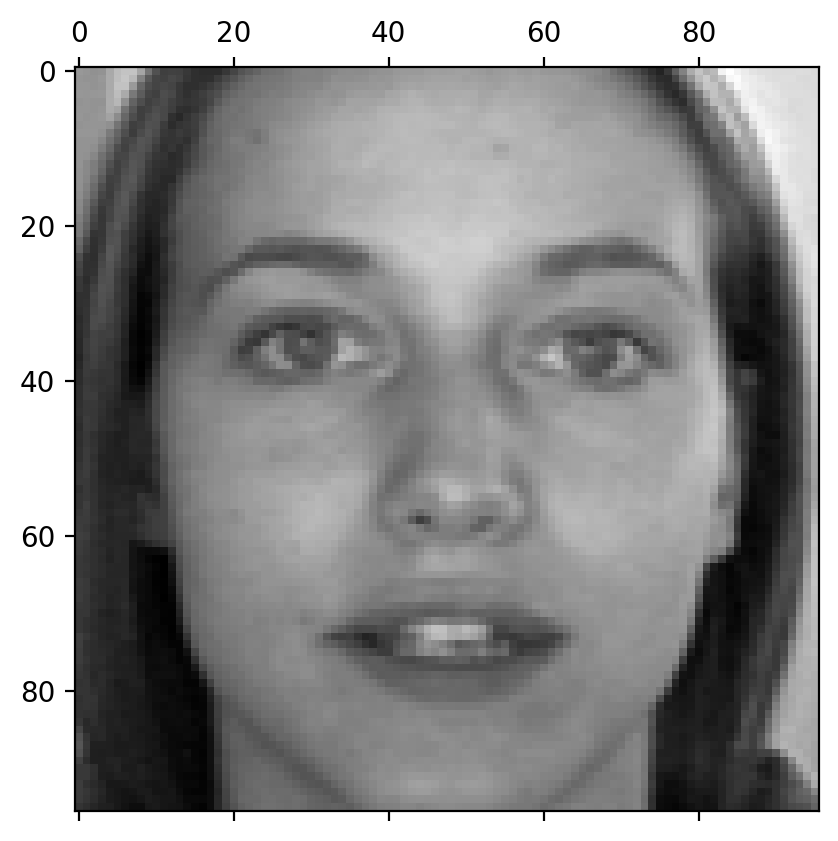

In [32]:
plt.matshow(M[9].reshape(96, -1), cmap = 'gray')

### numpy array to image file

In [33]:
from PIL import Image # Python Image Library

In [35]:
# creat a function

def numpy_array_to_img(mat: np.ndarray, img_name: 'img.png'):
    img = Image.fromarray(np.uint8(mat))
    img.save(img_name)

In [36]:
X = df.iloc[1]['mat']
X

array([ 76,  87,  81, ..., 228, 211, 168])

In [37]:
X.shape

(9216,)

In [38]:
X.reshape(96, -1)

array([[ 76,  87,  81, ..., 120, 115, 117],
       [ 68,  85,  84, ..., 132, 111, 106],
       [ 63,  78,  84, ..., 133, 110, 106],
       ...,
       [ 88,  99, 128, ..., 221, 180, 149],
       [ 91,  98, 121, ..., 247, 221, 178],
       [100, 110, 126, ..., 228, 211, 168]])

In [39]:
numpy_array_to_img(X.reshape(96, -1), 'face2.png')

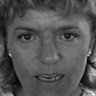

In [40]:
Image.open('face2.png')